# Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# Function

In [2]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'NEW' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

# Data

In [3]:
application_df = pd.read_csv('./datasets/application_record.csv')
credit_df = pd.read_csv('./datasets/credit_record.csv')
# df = df.merge(credit_df, how='inner', on=['ID'])
# df

In [4]:
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [5]:
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# Duplicate

**Check duplicate**

In [6]:
application_df.duplicated(subset='ID', keep=False).sum()

94

In [7]:
credit_df.duplicated().sum()

0

**Drop duplicate**

In [8]:
application_df=application_df.drop_duplicates(subset='ID', keep='first')

In [9]:
application_df.shape

(438510, 18)

# Missing Values

In [10]:
application_df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [11]:
credit_df.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

**Fill missing value**

In [12]:
application_df['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [13]:
application_df.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

# Cardinality of features

In [14]:
application_df.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            19
CNT_FAM_MEMBERS            13
dtype: int64

In [15]:
credit_df.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

**Drop constant feature**

In [16]:
application_df.drop('FLAG_MOBIL', axis=1, inplace=True)

**Find all users' account open month**

In [17]:
begin_month=pd.DataFrame(credit_df.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'BEGIN_MONTH'}) 
df=pd.merge(application_df,begin_month,how="left",on="ID")
df['BEGIN_MONTH'] = -df['BEGIN_MONTH']

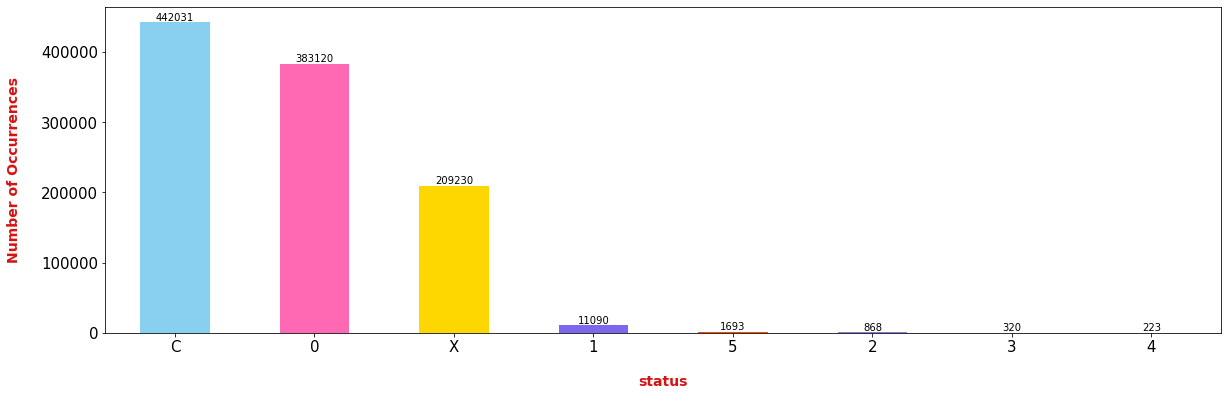

In [18]:
plt.figure(figsize = (20, 6))
ax = credit_df["STATUS"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

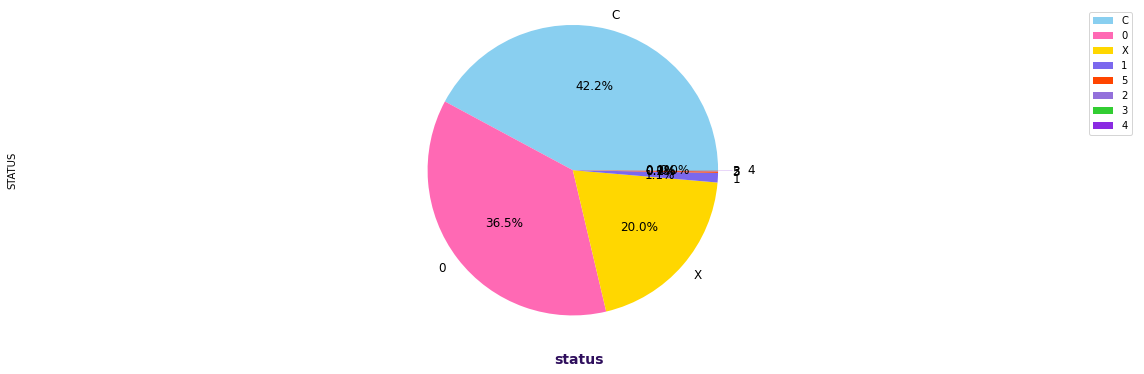

In [19]:
plt.figure(figsize = (20, 6))

counts = credit_df["STATUS"].value_counts()
explode = (0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [20]:
credit_df['TARGET'] = None
credit_df['TARGET'][credit_df['STATUS'] =='1']='Yes' 
credit_df['TARGET'][credit_df['STATUS'] =='2']='Yes' 
credit_df['TARGET'][credit_df['STATUS'] =='3']='Yes' 
credit_df['TARGET'][credit_df['STATUS'] =='4']='Yes' 
credit_df['TARGET'][credit_df['STATUS'] =='5']='Yes'
credit_df

,ID,MONTHS_BALANCE,STATUS,TARGET
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None
...,...,...,...,...
1048570,5150487,-25,C,None
1048571,5150487,-26,C,None
1048572,5150487,-27,C,None
1048573,5150487,-28,C,None


In [21]:
cpunt=credit_df.groupby('ID').count()
cpunt['TARGET'][cpunt['TARGET'] > 0]=1 
cpunt['TARGET'][cpunt['TARGET'] == 0]=0 
cpunt = cpunt[['TARGET']]
cpunt
df=pd.merge(df,cpunt,how='inner',on='ID')
df = df.dropna()
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,15.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,14.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,0,0,0,Managers,2.0,11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,0,0,0,Sales staff,2.0,9.0,1


# Visualize

## Binary features

   **CODE_GENDER**

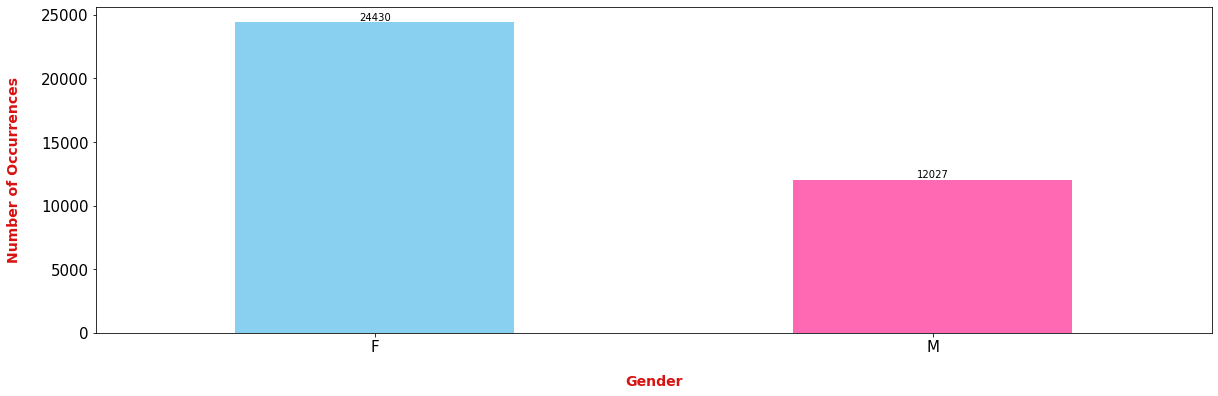

In [22]:
plt.figure(figsize = (20, 6))
ax = df["CODE_GENDER"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

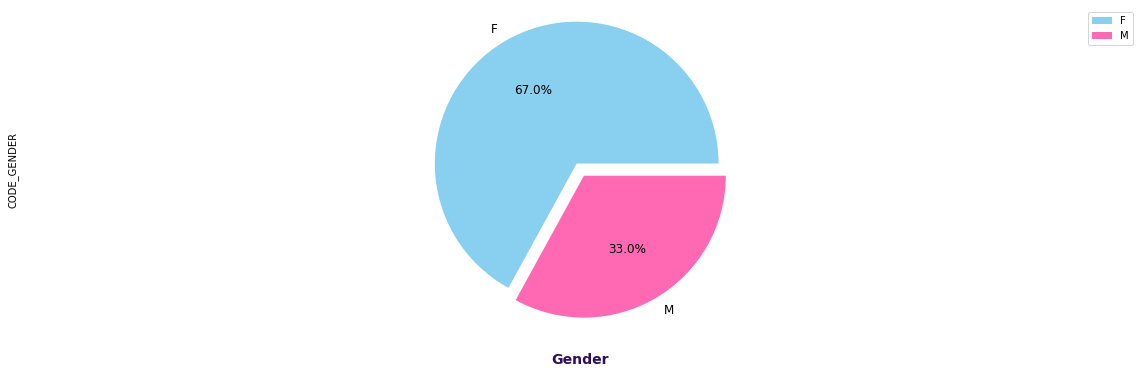

In [23]:
plt.figure(figsize = (20, 6))

counts = df["CODE_GENDER"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**FLAG_OWN_CAR**

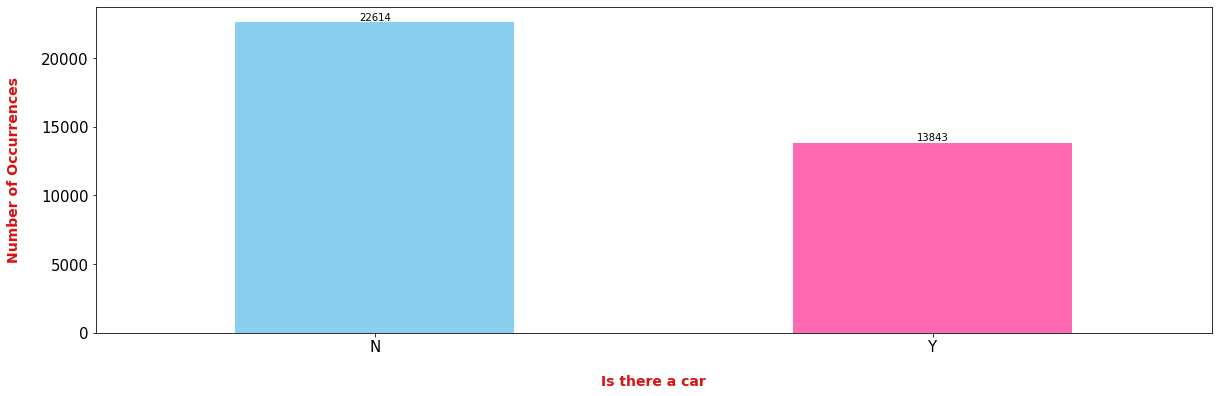

In [24]:
plt.figure(figsize = (20, 6))
ax = df["FLAG_OWN_CAR"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Is there a car', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

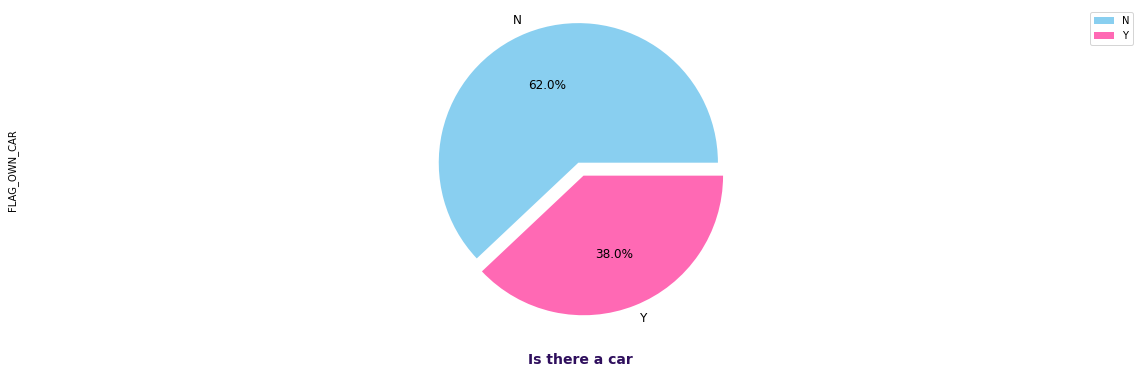

In [25]:
plt.figure(figsize = (20, 6))

counts = df["FLAG_OWN_CAR"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Is there a car', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**FLAG_OWN_REALTY**

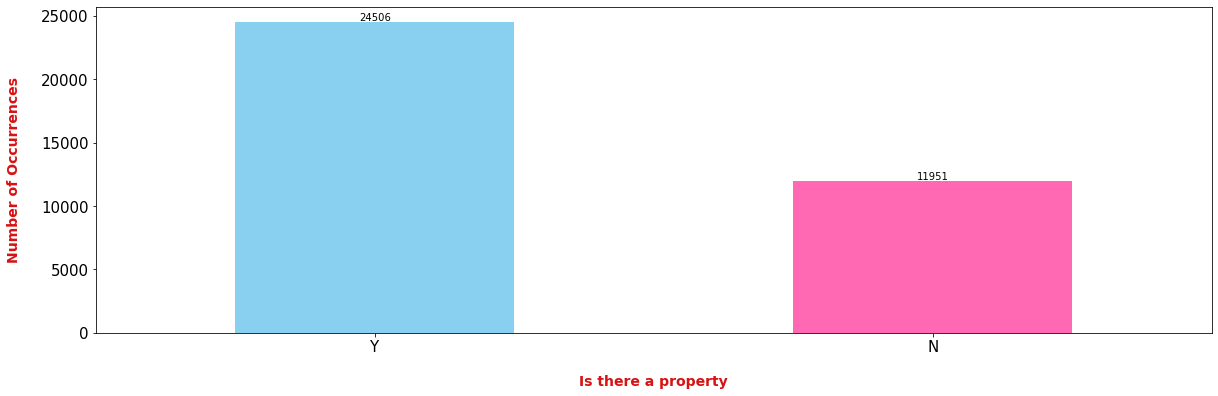

In [26]:
plt.figure(figsize = (20, 6))
ax = df["FLAG_OWN_REALTY"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Is there a property', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

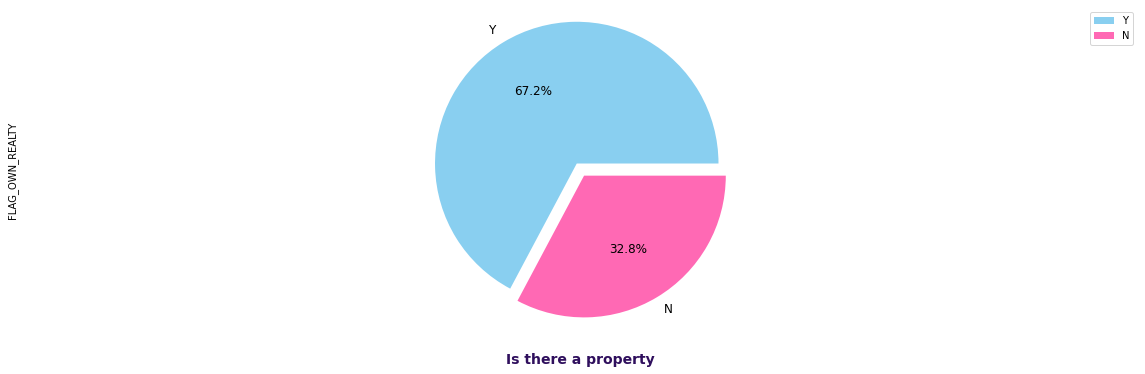

In [27]:
plt.figure(figsize = (20, 6))

counts = df["FLAG_OWN_REALTY"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Is there a property', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**FLAG_WORK_PHONE**

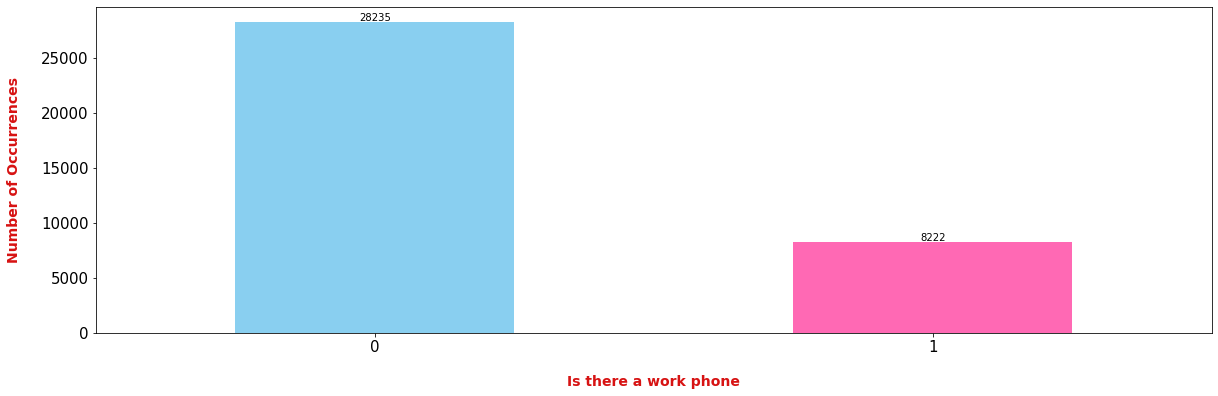

In [28]:
plt.figure(figsize = (20, 6))
ax = df["FLAG_WORK_PHONE"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Is there a work phone', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

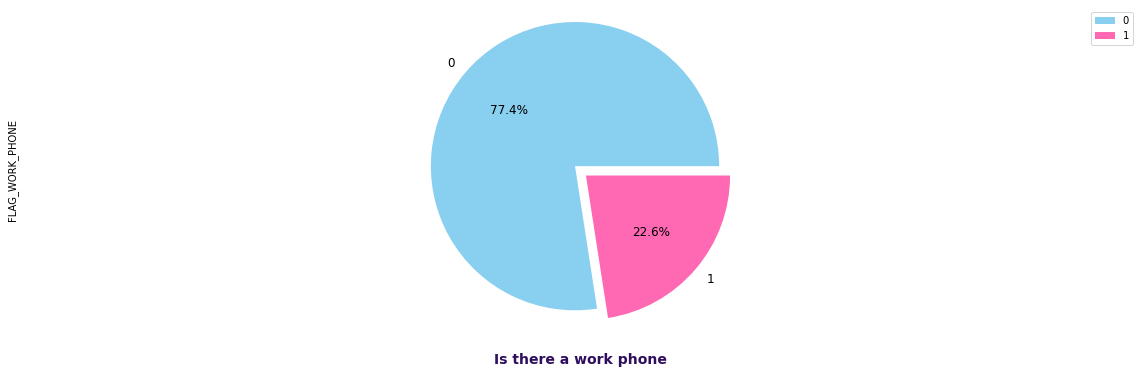

In [29]:
plt.figure(figsize = (20, 6))

counts = df["FLAG_WORK_PHONE"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Is there a work phone', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**FLAG_PHONE**

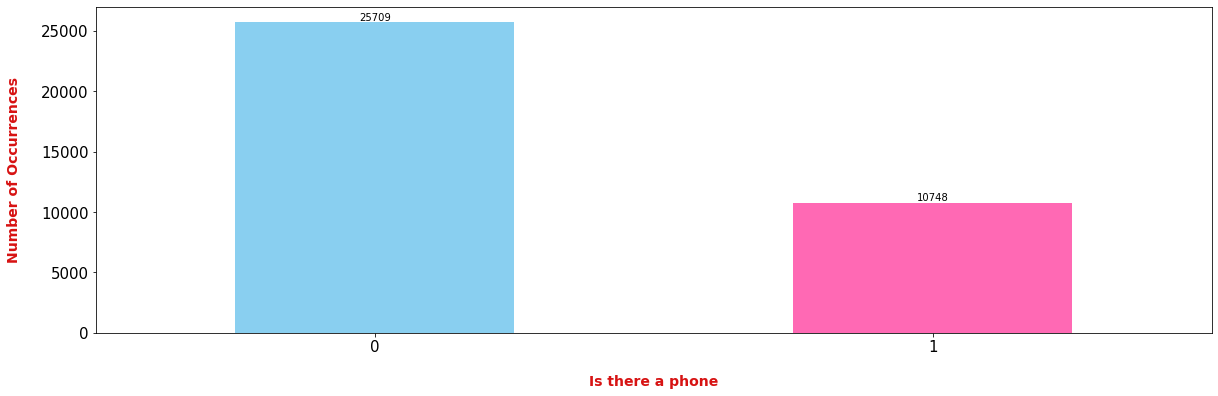

In [30]:
plt.figure(figsize = (20, 6))
ax = df["FLAG_PHONE"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Is there a phone', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

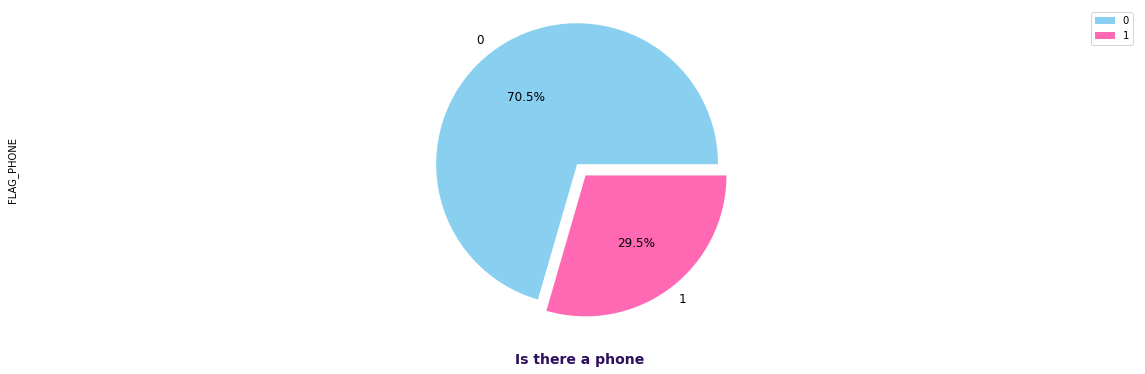

In [31]:
plt.figure(figsize = (20, 6))

counts = df["FLAG_PHONE"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Is there a phone', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**FLAG_EMAIL**

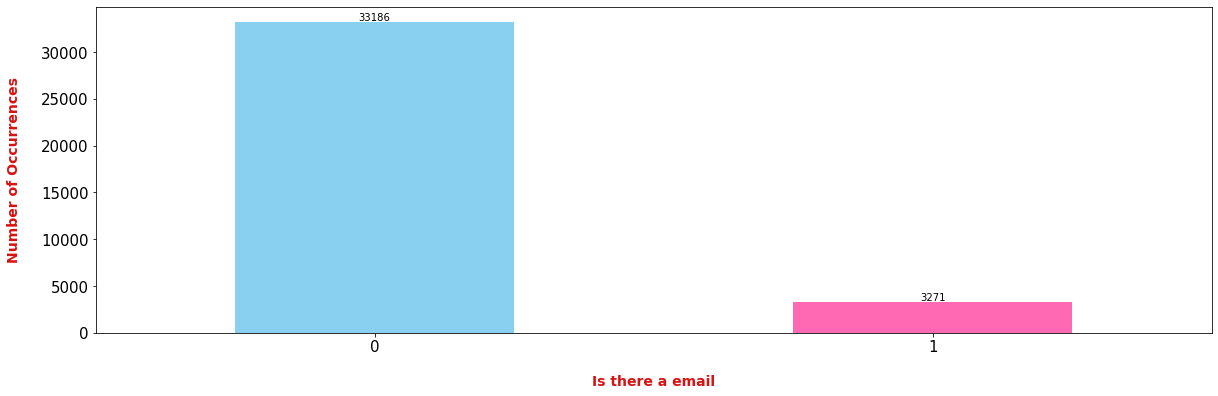

In [32]:
plt.figure(figsize = (20, 6))
ax = df["FLAG_EMAIL"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Is there a email', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

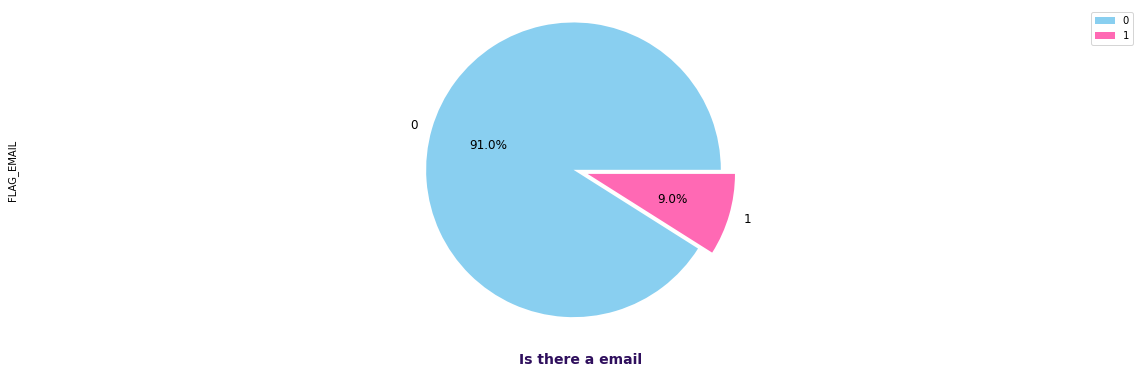

In [33]:
plt.figure(figsize = (20, 6))

counts = df["FLAG_EMAIL"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Is there a email', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

## Encoding binary features

In [34]:
df["CODE_GENDER"] =  df["CODE_GENDER"].replace(['F','M'],[0,1])
df["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y","N"],[1,0])
df["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0])

## Continuous features

**CNT_CHILDREN**

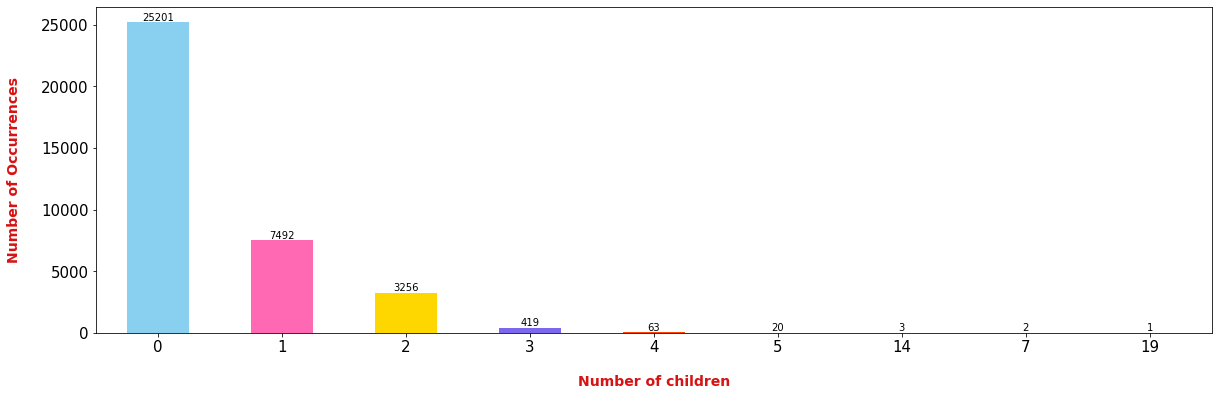

In [35]:
plt.figure(figsize = (20, 6))
ax = df["CNT_CHILDREN"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Number of children', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [36]:
df.loc[df['CNT_CHILDREN'] >= 2,'CNT_CHILDREN']='2More'

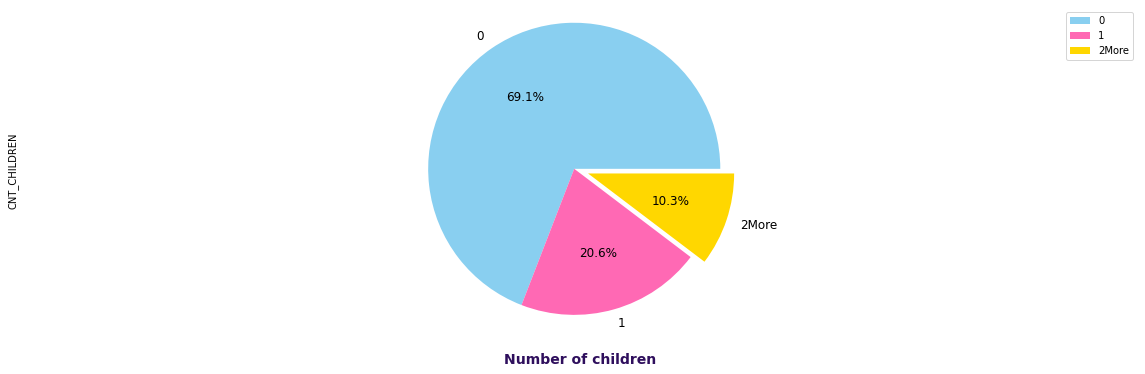

In [37]:
plt.figure(figsize = (20, 6))

counts = df["CNT_CHILDREN"].value_counts()
explode = (0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Number of children', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**AMT_INCOME_TOTAL**

<AxesSubplot:ylabel='Frequency'>

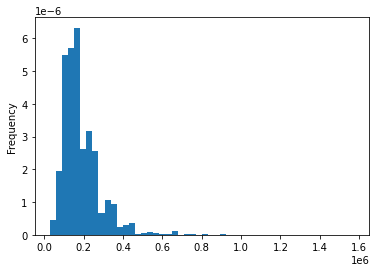

In [38]:
df['AMT_INCOME_TOTAL'].plot(kind='hist',bins=50,density=True)

In [39]:
df = get_category(df,'AMT_INCOME_TOTAL', 3, ["low","medium", "high"], qcut = True)
df.drop('AMT_INCOME_TOTAL', axis=1, inplace=True)

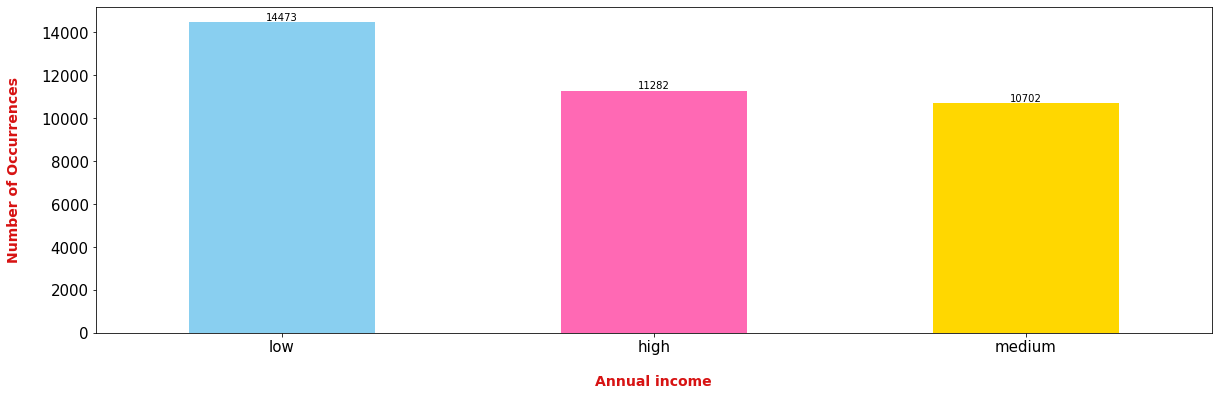

In [40]:
plt.figure(figsize = (20, 6))
ax = df["NEW_AMT_INCOME_TOTAL"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Annual income', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

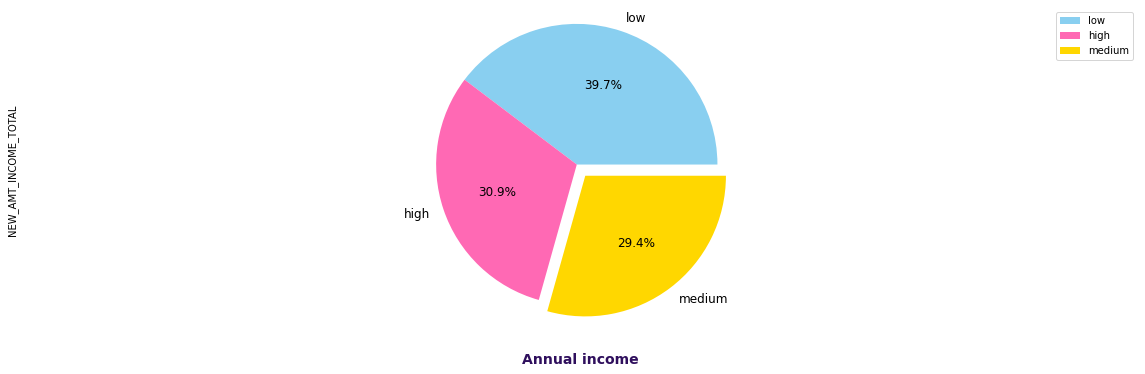

In [41]:
plt.figure(figsize = (20, 6))

counts = df["NEW_AMT_INCOME_TOTAL"].value_counts()
explode = (0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Annual income', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**DAY_BIRTH**

<AxesSubplot:ylabel='Frequency'>

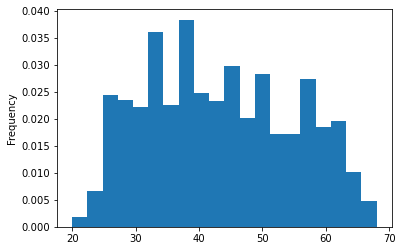

In [42]:
df['AGES']=-(df['DAYS_BIRTH'])//365

df['AGES'].plot(kind='hist',bins=20,density=True)

In [43]:
df = get_category(df,'AGES',5, ["lowest","low","medium","high","highest"])
df.drop('DAYS_BIRTH', axis=1, inplace=True)
df.drop('AGES', axis=1, inplace=True)

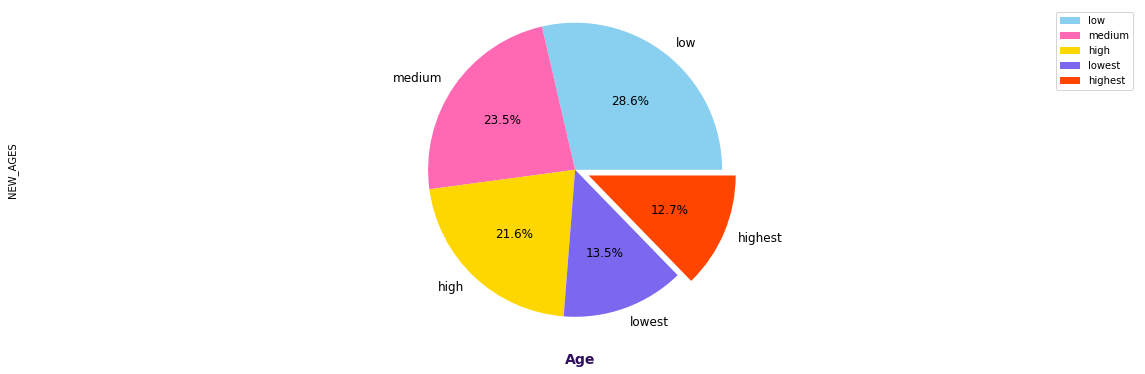

In [44]:
plt.figure(figsize = (20, 6))

counts = df["NEW_AGES"].value_counts()
explode = (0, 0.0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Age', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**DAYS_EMPLOYED**

<AxesSubplot:ylabel='Frequency'>

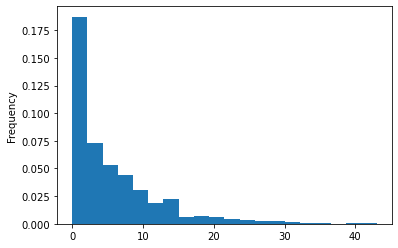

In [45]:
df['WORKING_YEAR']=-(df['DAYS_EMPLOYED'])//365
df[df['WORKING_YEAR']<0] = 0
df['WORKING_YEAR'].plot(kind='hist',bins=20,density=True)

In [46]:
df = get_category(df,'WORKING_YEAR',5, ["lowest","low","medium","high","highest"])
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)
df.drop('WORKING_YEAR', axis=1, inplace=True)

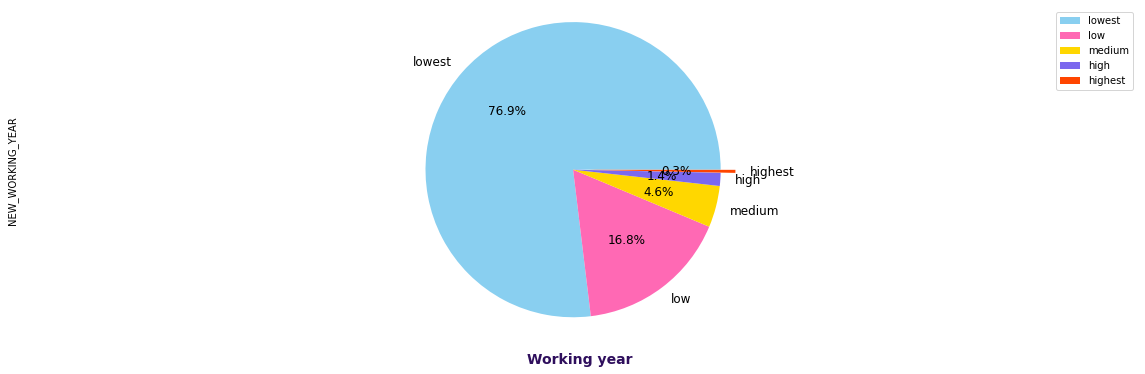

In [47]:
plt.figure(figsize = (20, 6))

counts = df["NEW_WORKING_YEAR"].value_counts()
explode = (0, 0.0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Working year', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

**CNT_FAM_MEMBERS**

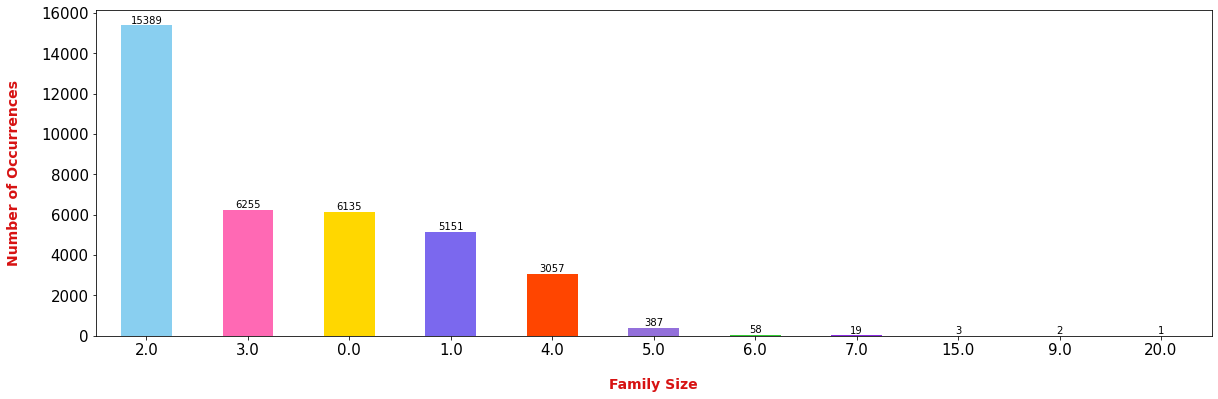

In [48]:
plt.figure(figsize = (20, 6))
ax = df["CNT_FAM_MEMBERS"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Family Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [49]:
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].astype(int)
df.loc[df['CNT_FAM_MEMBERS']>=3,'CNT_FAM_MEMBERS']='3More'

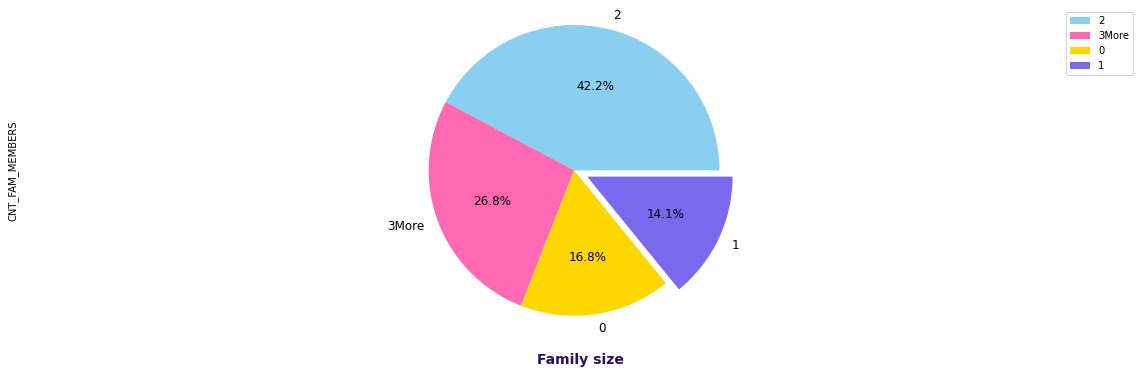

In [50]:
plt.figure(figsize = (20, 6))

counts = df["CNT_FAM_MEMBERS"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Family size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

## Categorical Features